 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Autoencoders" data-toc-modified-id="Autoencoders-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autoencoders</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Cool-theory-bro,-but-what-can-autoencoders-actually-do-for-me?" data-toc-modified-id="Cool-theory-bro,-but-what-can-autoencoders-actually-do-for-me?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cool theory bro, but what can autoencoders actually do for me?</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Simplest-possible-autoencoder-model" data-toc-modified-id="Simplest-possible-autoencoder-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simplest possible autoencoder model</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Encoder-Model" data-toc-modified-id="Encoder-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Encoder Model</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Decoder-Model" data-toc-modified-id="Decoder-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Decoder Model</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Dataset" data-toc-modified-id="Dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Training" data-toc-modified-id="Training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Helper-function-to-visualize-some-images" data-toc-modified-id="Helper-function-to-visualize-some-images-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Helper function to visualize some images</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Adding-a-sparsity-constraint-on-the-encoded-representations" data-toc-modified-id="Adding-a-sparsity-constraint-on-the-encoded-representations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Adding a sparsity constraint on the encoded representations</a></span></li><li><span><a href="http://localhost:8888/notebooks/AutoEncoders/simplest-autoencoder.ipynb#Adding-a-sparsity-constraint-on-the-encoded-representations" data-toc-modified-id="Adding-a-sparsity-constraint-on-the-encoded-representations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Adding a sparsity constraint on the encoded representations</a></span></li></ul></div>



In the supervised learning landscape, computers learn how to map one vector to another, given enough examples of the mapping. However, not all problems we might want to solve fall into this category. We may wish to:

- generate new examples
- determine how likely some point is, 
- handle missing values
- take advantage of a large set of unlabeled examples or examples from related tasks.

A shortcoming of the current state of the art for industrial applications is that our learning algorithms require large amounts of supervised data to achieve good accuracy. 


# Motivation
>Many deep learning algorithms have been designed to tackle unsupervised learning problems, but none have truly solved the problem in the same way that deep learning has largely solved the supervised learning problem for a wide variety of tasks. A central cause of the difficulties with unsupervised learning is the high dimensionality of the random variables being modeled. This is brings two distinct challenges:
- a statistical challenge
- a computational challenge

[Deep Learning book]() 


In Unsupervised Leaning problem, we only use the inputs $x^{(t)}$ for learning. Some of the benefits of unsupervised learning include:

- To automatically extract meaningful features for your data
- To leverage the availability of unlabeled data
- To add a data-dependent regularizer to trainings.


This post is the first in what I hope to be a series covering a range of unsupervised learning problems.

# Autoencoders

An **autoencoder** is a Feed-forward neural network that is trained to attempt to copy its input to its output. Internally, it has a hidden layer $h$ that describes a code used to represent the input. 

![](images/autoencoder-1.png)
[Source: Hugo Larochelle 's Neural Networks ](http://info.usherbrooke.ca/hlarochelle/neural_networks/content.html)


The following is the architecture of an autoencoder:
![](http://ufldl.stanford.edu/tutorial/images/Autoencoder636.png)

One can observe that the dimensionality of the input is the same as the dimensionality of the output, and essentially what we want is 
$\hat x = x$

For instance, 
![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 
-  data-specific, 
-  lossy, and 
-  learned automatically from examples rather than engineered by a human. 
-  Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.



1. Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2. Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3. Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. It's simple! And you don't even need to understand any of these words to start using autoencoders in practice. [keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

# Cool theory bro, but what can autoencoders actually do for me?

Good question!

Autoencoders can be used for finding a low-dimensional representation of your input data. Why is this useful?

Some of your features may be redundant or correlated, resulting in wasted processing time and overfitting in your model (too many parameters).

It is thus ideal to only include the features we need.

If your “reconstruction” of x is very accurate, that means your low-dimensional representation is good.

You can then use this transformation as input into another model.

# Simplest possible autoencoder model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))

from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32
# This is our input placeholder
input_img = Input(shape=(784, ))

In [38]:
def create_autoencoder(activity_regularizer=None):
    # "encoded" is the encoded representation of the input
    encoded = Dense(
        encoding_dim,
        activation='relu',
        activity_regularizer=activity_regularizer)(input_img)
    # "Decoded" is the lossy reconstruction of the input
    decoded = Dense(784, activation='sigmoid')(encoded)
    # This model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    return autoencoder, encoded, decoded

In [4]:
autoencoder, encoded, decoded = create_autoencoder()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


# Encoder Model

- This model maps an input to its encoded representation

In [5]:
def create_encoder(encoded):
    # This model maps an input to its encoded representation
    encoder = Model(input_img, encoded)
    return encoder
    

In [6]:
encoder = create_encoder(encoded)

In [7]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


# Decoder Model

In [8]:
def create_decoder(autoencoder):
    # Create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim, ))
    # Retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # Create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    return decoder

In [9]:
decoder = create_decoder(autoencoder)

In [10]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


Now let's train our autoencoder to reconstruct MNIST digits.

- First, we will configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Dataset

Let's prepare our input data. We're using MNIST digits, and we are discarding the labels (since we are only interested in encoding/decoding the input images).

In [12]:
from keras.datasets import mnist
import numpy as np

In [13]:
(x_train, _), (x_test, _) = mnist.load_data()

We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [15]:
n_train = len(x_train)
n_test = len(x_test)
n_train

60000

In [16]:
img_flat = np.prod(x_train.shape[1:])
img_flat

784

In [17]:
x_train = x_train.reshape((n_train, img_flat))
x_test = x_test.reshape(n_test, img_flat)

In [18]:
x_train.shape

(60000, 784)

In [19]:
x_test.shape

(10000, 784)

# Training

Let's train our autoencoder for 50 epochs

In [20]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3756 - val_loss: 0.2720
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2642 - val_loss: 0.2535
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2441 - val_loss: 0.2328
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2255 - val_loss: 0.2158
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2102 - val_loss: 0.2022
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1982 - val_loss: 0.1917
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1892 - val_loss: 0.1839
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1822 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1763 - val_loss: 0.1722
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1712 - val_loss: 0.1673

We can try to visualize the reconstructed inputs and the encoded representations.

- Encode and decode some digits. Note that we take them from the test set.

In [21]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Helper function to visualize some images

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.

In [22]:
def plot_images(n=10):
    for i in range(n):
        # display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

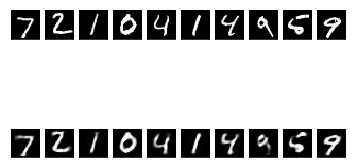

In [23]:
plot_images()

# Adding a sparsity constraint on the encoded representations

In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of [PCA (principal component analysis)](https://en.wikipedia.org/wiki/Principal_component_analysis).

But, another way to constrain the representations to be compact is to add a sparsity constraint on the activity of the hidden representations, so fewer units would **fire** at a given time. In keras, this can be done by adding an ```activity_regularizer``` to our ```Dense``` layer:

In [24]:
from keras import regularizers

In [25]:
act_reg = regularizers.l1(10e-5)

In [37]:
act_reg.l1

array(9.999999747378752e-05, dtype=float32)

In [26]:
autoencoder, encoded, decoded = create_autoencoder(activity_regularizer=act_reg)

In [27]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [28]:
encoder = create_encoder(encoded)

In [29]:
decoder = create_decoder(autoencoder)

Let's train this model for 100 epochs (with the added regularization the model is less likely to overfit and can be trained longer)

In [30]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [31]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
4s - loss: 1.6601 - val_loss: 0.8158
Epoch 2/100
4s - loss: 0.7923 - val_loss: 0.7866
Epoch 3/100
4s - loss: 0.7698 - val_loss: 0.7657
Epoch 4/100
5s - loss: 0.7490 - val_loss: 0.7449
Epoch 5/100
5s - loss: 0.7287 - val_loss: 0.7256
Epoch 6/100
4s - loss: 0.7109 - val_loss: 0.7090
Epoch 7/100
5s - loss: 0.6946 - val_loss: 0.6930
Epoch 8/100
4s - loss: 0.6795 - val_loss: 0.6803
Epoch 9/100
5s - loss: 0.6657 - val_loss: 0.6683
Epoch 10/100
4s - loss: 0.6535 - val_loss: 0.6566
Epoch 11/100
4s - loss: 0.6434 - val_loss: 0.6471
Epoch 12/100
4s - loss: 0.6352 - val_loss: 0.6434
Epoch 13/100
4s - loss: 0.6289 - val_loss: 0.6374
Epoch 14/100
4s - loss: 0.6239 - val_loss: 0.6312
Epoch 15/100
4s - loss: 0.6198 - val_loss: 0.6290
Epoch 16/100
4s - loss: 0.6166 - val_loss: 0.6257
Epoch 17/100
4s - loss: 0.6139 - val_loss: 0.6233
Epoch 18/100
5s - loss: 0.6117 - val_loss: 0.6230
Epoch 19/100
4s - loss: 0.6098 - val_loss: 0.6228
Epoch 20/

In [32]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

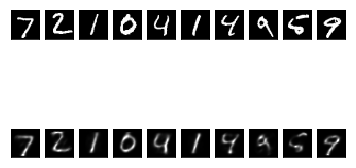

In [33]:
plot_images()